In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
function TM(u, p, t)
    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [10]:
time = 250
transient_time = 250
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [11]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.35;  const ΔU0 = 0.305;

In [12]:
u0_start = SA[3.740482362235197, 0.8176653843010522, 0.4087238640418287]
I0range = range( -1.4, -1.709, length = 3001 )

-1.4:-0.000103:-1.709

In [13]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [14]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = u0_start
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = CoupledODEs(TM,  u0, p, diffeq = integ_set)

    tr, _ = trajectory(ds, 150.0, Δt = tstep; Ttr = transient_time)
    u0 = tr[end]; ds = CoupledODEs(TM,  u0, p, diffeq = integ_set)
    Λ = lyapunovspectrum(ds, time)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -1.4
u0: [3.740482362235197, 0.8176653843010522, 0.4087238640418287]
Λ: [-0.014080756723782723, -1.7771258206469485, -4.289545114576345]
last point: [20.04822117021227, 0.6473588443475063, 0.4192323152424439]
----------------
  
index: 2; I0: -1.400103
u0: [20.04822117021227, 0.6473588443475063, 0.4192323152424439]
Λ: [-0.016842347481306228, -1.7641454119201234, -4.291360139299121]
last point: [7.60548562566696, 0.6644480333998339, 0.404967569812996]
----------------
  
index: 3; I0: -1.400206
u0: [7.60548562566696, 0.6644480333998339, 0.404967569812996]
Λ: [0.00584130041758217, -1.7780505132356814, -4.291500630394797]
last point: [3.732946754956046, 0.8143452764852297, 0.40816993988008143]
----------------
  
index: 4; I0: -1.400309
u0: [3.732946754956046, 0.8143452764852297, 0.40816993988008143]
Λ: [-0.001968353377641961, -1.7737801111334035, -4.299251526820734]
last point: [12.792484345003428, 0.761297353473215, 0.4205180611532451]
----------------
  
index: 5; I0: -1.

----------------
  
index: 34; I0: -1.403399
u0: [4.873267646242482, 0.7447957343367378, 0.4033128442835651]
Λ: [-0.009305881902865229, -1.6461736900502508, -4.392647888773578]
last point: [16.745562978326834, 0.7110438312717045, 0.4207133628647064]
----------------
  
index: 35; I0: -1.403502
u0: [16.745562978326834, 0.7110438312717045, 0.4207133628647064]
Λ: [-0.0031196382512544466, -1.6339818784313225, -4.400703654204771]
last point: [5.748193304361616, 0.7140588929997927, 0.4033638943961176]
----------------
  
index: 36; I0: -1.403605
u0: [5.748193304361616, 0.7140588929997927, 0.4033638943961176]
Λ: [-0.011360598928107101, -1.6439115120190912, -4.3909729674094224]
last point: [7.772537881659341, 0.8121284428318449, 0.41858506772778115]
----------------
  
index: 37; I0: -1.403708
u0: [7.772537881659341, 0.8121284428318449, 0.41858506772778115]
Λ: [0.002132546651196836, -1.6297694042815922, -4.405285077708724]
last point: [10.295093633458485, 0.615552338245177, 0.4080424048898163]

----------------
  
index: 67; I0: -1.406798
u0: [3.8751494026737934, 0.7941216373324552, 0.40588585916672687]
Λ: [-0.0029792990074584175, -1.5256821625178765, -4.485851411534285]
last point: [13.347029245342139, 0.583382231728457, 0.41097478790104325]
----------------
  
index: 68; I0: -1.406901
u0: [13.347029245342139, 0.583382231728457, 0.41097478790104325]
Λ: [0.0005076488235654173, -1.5245259863599767, -4.481655974850381]
last point: [5.072579170515505, 0.8315966913718665, 0.4154771654254374]
----------------
  
index: 69; I0: -1.407004
u0: [5.072579170515505, 0.8315966913718665, 0.4154771654254374]
Λ: [-0.009300160183927101, -1.508801936080834, -4.491823400928781]
last point: [7.3575790782071255, 0.6695492045514088, 0.40492655969021996]
----------------
  
index: 70; I0: -1.407107
u0: [7.3575790782071255, 0.6695492045514088, 0.40492655969021996]
Λ: [-0.0024741774756605194, -1.5116870204130572, -4.494344214554086]
last point: [9.804150348057247, 0.793310519015247, 0.41991414017766

----------------
  
index: 100; I0: -1.410197
u0: [15.362523304286515, 0.7306677839756219, 0.42112604568681267]
Λ: [-0.00030155043590985084, -1.4118334338103429, -4.568798280347306]
last point: [3.806724043015257, 0.8260464600487097, 0.4107344512795535]
----------------
  
index: 101; I0: -1.4103
u0: [3.806724043015257, 0.8260464600487097, 0.4107344512795535]
Λ: [-0.00677532220142712, -1.385684673815108, -4.580104032152328]
last point: [5.990043632650276, 0.705998793080722, 0.40372692554720446]
----------------
  
index: 102; I0: -1.410403
u0: [5.990043632650276, 0.705998793080722, 0.40372692554720446]
Λ: [-0.006072014979103301, -1.3957603521576316, -4.579480004693055]
last point: [19.133376411710625, 0.5748768415646153, 0.41576002598445544]
----------------
  
index: 103; I0: -1.410506
u0: [19.133376411710625, 0.5748768415646153, 0.41576002598445544]
Λ: [-0.0019140350232656124, -1.4063028015257188, -4.571815247996443]
last point: [4.571241871331114, 0.8331363803300238, 0.4144452451787

----------------
  
index: 133; I0: -1.413596
u0: [4.140369909474724, 0.7768329229487151, 0.4047754441881267]
Λ: [-0.013206914948335731, -1.284662711915449, -4.650955987603152]
last point: [5.898704506778103, 0.7085337918015898, 0.40377003093538705]
----------------
  
index: 134; I0: -1.413699
u0: [5.898704506778103, 0.7085337918015898, 0.40377003093538705]
Λ: [-0.0018082931938605815, -1.2922525739101776, -4.655414395938331]
last point: [10.437631618648219, 0.6124069775192156, 0.40854333707177976]
----------------
  
index: 135; I0: -1.413802
u0: [10.437631618648219, 0.6124069775192156, 0.40854333707177976]
Λ: [-0.0029908896212342473, -1.2860701208255465, -4.661192712730494]
last point: [20.186651680214563, 0.5848444437857371, 0.41697063647787513]
----------------
  
index: 136; I0: -1.413905
u0: [20.186651680214563, 0.5848444437857371, 0.41697063647787513]
Λ: [0.0014293705728850845, -1.2911976960266682, -4.654094126366091]
last point: [8.576327225944665, 0.8053344429249695, 0.4195744

last point: [7.696277280878671, 0.6608135791717562, 0.40564434969806296]
----------------
  
index: 166; I0: -1.416995
u0: [7.696277280878671, 0.6608135791717562, 0.40564434969806296]
Λ: [0.0021375320664324326, -1.184490169761414, -4.727371693357961]
last point: [7.740120922357918, 0.6598229929881002, 0.40569779378018883]
----------------
  
index: 167; I0: -1.417098
u0: [7.740120922357918, 0.6598229929881002, 0.40569779378018883]
Λ: [0.0026988660434772668, -1.1835818747282671, -4.729192090038143]
last point: [8.601009737034456, 0.6419954748760031, 0.4066837876582917]
----------------
  
index: 168; I0: -1.417201
u0: [8.601009737034456, 0.6419954748760031, 0.4066837876582917]
Λ: [0.0007331497274776147, -1.1822105499724627, -4.730935731377149]
last point: [10.670006541757372, 0.6088808396335166, 0.40890243375688845]
----------------
  
index: 169; I0: -1.417304
u0: [10.670006541757372, 0.6088808396335166, 0.40890243375688845]
Λ: [-0.00564105216144864, -1.1785191733224862, -4.73237780430

Λ: [-0.0023769816620627673, -1.0934873228238366, -4.791790810699513]
last point: [8.68862103760285, 0.6400042333393238, 0.4068952715837088]
----------------
  
index: 199; I0: -1.420394
u0: [8.68862103760285, 0.6400042333393238, 0.4068952715837088]
Λ: [-0.008020790115867352, -1.0907310173986426, -4.787259613835327]
last point: [5.591833186758979, 0.7177907879429901, 0.40381627905514916]
----------------
  
index: 200; I0: -1.420497
u0: [5.591833186758979, 0.7177907879429901, 0.40381627905514916]
Λ: [-0.005953681330441736, -1.0870167470378365, -4.791815720372172]
last point: [4.257307084672288, 0.7701442469952633, 0.4046187135256151]
----------------
  
index: 201; I0: -1.4206
u0: [4.257307084672288, 0.7701442469952633, 0.4046187135256151]
Λ: [-0.009727577247140892, -1.0805721870601959, -4.793439345578159]
last point: [3.7699328665122724, 0.800227931595742, 0.4068881665279388]
----------------
  
index: 202; I0: -1.420703
u0: [3.7699328665122724, 0.800227931595742, 0.4068881665279388]
Λ

u0: [16.946004626493625, 0.5666616558141545, 0.4143967504565714]
Λ: [-0.0018758413643705785, -0.9893490614326124, -4.855672545337204]
last point: [5.841083295561091, 0.7095434095187177, 0.4040541176347447]
----------------
  
index: 232; I0: -1.423793
u0: [5.841083295561091, 0.7095434095187177, 0.4040541176347447]
Λ: [0.003886051220358654, -0.9993011186016615, -4.85571979643059]
last point: [3.675758913349179, 0.8208448839104068, 0.4098942309196739]
----------------
  
index: 233; I0: -1.423896
u0: [3.675758913349179, 0.8208448839104068, 0.4098942309196739]
Λ: [-0.004429460204121231, -1.0042011450032464, -4.851636652603104]
last point: [9.852970909016184, 0.7935481459162308, 0.42066075087788524]
----------------
  
index: 234; I0: -1.423999
u0: [9.852970909016184, 0.7935481459162308, 0.42066075087788524]
Λ: [-0.010940673958516754, -0.9904234788149531, -4.857845639418355]
last point: [20.01991698971747, 0.5789909907519042, 0.4170382275248461]
----------------
  
index: 235; I0: -1.42410

----------------
  
index: 264; I0: -1.427089
u0: [11.275772100647622, 0.6001952162193963, 0.4098458399822863]
Λ: [-0.009022958982315338, -0.9055035643295016, -4.90927176710136]
last point: [3.654125587920722, 0.8140973492798116, 0.4088322165958411]
----------------
  
index: 265; I0: -1.427192
u0: [3.654125587920722, 0.8140973492798116, 0.4088322165958411]
Λ: [-0.008765559577401733, -0.8974867743228454, -4.916141840415968]
last point: [20.453190820458722, 0.6432490524303536, 0.4203322819805038]
----------------
  
index: 266; I0: -1.427295
u0: [20.453190820458722, 0.6432490524303536, 0.4203322819805038]
Λ: [-0.004247197955492398, -0.8968456171774138, -4.919975940967138]
last point: [7.047206031320091, 0.6753493216944298, 0.4052737940523791]
----------------
  
index: 267; I0: -1.427398
u0: [7.047206031320091, 0.6753493216944298, 0.4052737940523791]
Λ: [-0.008214687612829225, -0.8998945412184666, -4.9134487699763625]
last point: [3.704992452660942, 0.8247869249674608, 0.410800150272477

last point: [5.665572246832081, 0.7146369187301593, 0.4041654160783396]
----------------
  
index: 297; I0: -1.430488
u0: [5.665572246832081, 0.7146369187301593, 0.4041654160783396]
Λ: [-0.00642000538001354, -0.8270558681982964, -4.966632252881138]
last point: [15.405416600821512, 0.7315315492941592, 0.4220106219662835]
----------------
  
index: 298; I0: -1.430591
u0: [15.405416600821512, 0.7315315492941592, 0.4220106219662835]
Λ: [-0.00021602056550678738, -0.8127323139024005, -4.971520092062776]
last point: [5.306275855736795, 0.7267200043003975, 0.404045178159997]
----------------
  
index: 299; I0: -1.430694
u0: [5.306275855736795, 0.7267200043003975, 0.404045178159997]
Λ: [-0.003867564899605425, -0.822519162248157, -4.970522970607303]
last point: [12.187898174646197, 0.7695932970291071, 0.42170170643608496]
----------------
  
index: 300; I0: -1.430797
u0: [12.187898174646197, 0.7695932970291071, 0.42170170643608496]
Λ: [-0.008038977091260417, -0.8039010272149412, -4.9751535228988

Λ: [-0.004825593147501467, -0.7421441098803622, -5.014858109431903]
last point: [3.6428776449388707, 0.8208766263414717, 0.41015033114913013]
----------------
  
index: 330; I0: -1.433887
u0: [3.6428776449388707, 0.8208766263414717, 0.41015033114913013]
Λ: [0.00112206828786988, -0.7322110341355729, -5.026528046023338]
last point: [8.513656993147668, 0.6420262966356974, 0.40717594618961045]
----------------
  
index: 331; I0: -1.43399
u0: [8.513656993147668, 0.6420262966356974, 0.40717594618961045]
Λ: [-0.004946448714918824, -0.7377462203144265, -5.02057091695616]
last point: [13.504848913962908, 0.7549423282611959, 0.42206667047546875]
----------------
  
index: 332; I0: -1.434093
u0: [13.504848913962908, 0.7549423282611959, 0.42206667047546875]
Λ: [-0.0007564049088218834, -0.7330793855842849, -5.02375236849141]
last point: [4.284594542726557, 0.767623189366195, 0.40490614633049055]
----------------
  
index: 333; I0: -1.434196
u0: [4.284594542726557, 0.767623189366195, 0.4049061463304

u0: [17.444892851478905, 0.5641640630703117, 0.4152369059129211]
Λ: [-0.003495223969441245, -0.6626648698226107, -5.069597934399986]
last point: [13.300629894727887, 0.7574626990631373, 0.42217762471324694]
----------------
  
index: 363; I0: -1.437286
u0: [13.300629894727887, 0.7574626990631373, 0.42217762471324694]
Λ: [-0.001067442057737194, -0.6506078755323184, -5.0694646557744845]
last point: [3.7242718318675014, 0.8278833072510202, 0.411774831279546]
----------------
  
index: 364; I0: -1.437389
u0: [3.7242718318675014, 0.8278833072510202, 0.411774831279546]
Λ: [-0.006789772401597001, -0.6439556351202417, -5.07366750903735]
last point: [5.458645016647888, 0.7209911053266367, 0.4042958029150607]
----------------
  
index: 365; I0: -1.437492
u0: [5.458645016647888, 0.7209911053266367, 0.4042958029150607]
Λ: [-0.0043961239115179445, -0.6576685941149787, -5.068993207857796]
last point: [16.393499581697878, 0.5649635623648624, 0.41445614509663314]
----------------
  
index: 366; I0: -1

----------------
  
index: 395; I0: -1.440582
u0: [9.98657026416923, 0.6158908972957987, 0.40903903790531393]
Λ: [0.0028341204637424397, -0.5752571964859547, -5.119639503361977]
last point: [14.271021166556174, 0.5726386976602843, 0.4129334398606296]
----------------
  
index: 396; I0: -1.440685
u0: [14.271021166556174, 0.5726386976602843, 0.4129334398606296]
Λ: [-0.0035809891600709584, -0.5741202553567388, -5.119336323382338]
last point: [20.722143464761377, 0.5838684718859481, 0.4183290746155432]
----------------
  
index: 397; I0: -1.440788
u0: [20.722143464761377, 0.5838684718859481, 0.4183290746155432]
Λ: [-0.011425481726374906, -0.5733834106749283, -5.1172683087223945]
last point: [13.891569318764793, 0.7507848917903222, 0.42240014212143917]
----------------
  
index: 398; I0: -1.440891
u0: [13.891569318764793, 0.7507848917903222, 0.42240014212143917]
Λ: [-0.004583956725978877, -0.5804620863030004, -5.112343452796637]
last point: [4.46751061519871, 0.8352262828077631, 0.415666841

last point: [6.830474640980504, 0.6795768005094533, 0.4056019164902681]
----------------
  
index: 428; I0: -1.443981
u0: [6.830474640980504, 0.6795768005094533, 0.4056019164902681]
Λ: [-0.026440810149175317, -0.47503699822335704, -5.162925977082246]
last point: [6.063589912619343, 0.701198137901495, 0.404870377115519]
----------------
  
index: 429; I0: -1.444084
u0: [6.063589912619343, 0.701198137901495, 0.404870377115519]
Λ: [-0.024158957901859086, -0.4752201815081107, -5.164116953137503]
last point: [5.9114440658629315, 0.7058458831314574, 0.404757539389297]
----------------
  
index: 430; I0: -1.444187
u0: [5.9114440658629315, 0.7058458831314574, 0.404757539389297]
Λ: [-0.022381756551684326, -0.47537587896168565, -5.165224872412918]
last point: [6.3088704027082505, 0.6939436938937276, 0.40508919525889014]
----------------
  
index: 431; I0: -1.44429
u0: [6.3088704027082505, 0.6939436938937276, 0.40508919525889014]
Λ: [-0.008468214576286893, -0.4886805442341406, -5.165570146579286]

Λ: [-0.008914251043045208, -0.41092969595129575, -5.208118454304945]
last point: [6.115435423580267, 0.6994016854259764, 0.4050210816641539]
----------------
  
index: 461; I0: -1.44738
u0: [6.115435423580267, 0.6994016854259764, 0.4050210816641539]
Λ: [0.002251887388496192, -0.42586069353780326, -5.206927178662218]
last point: [3.9814678605977356, 0.782217166421515, 0.40612338060355635]
----------------
  
index: 462; I0: -1.447483
u0: [3.9814678605977356, 0.782217166421515, 0.40612338060355635]
Λ: [0.00028052702651583145, -0.42990995094308093, -5.202643128910172]
last point: [3.6342060864141446, 0.8251254396616499, 0.4113519287539731]
----------------
  
index: 463; I0: -1.447586
u0: [3.6342060864141446, 0.8251254396616499, 0.4113519287539731]
Λ: [-0.0029598452056555334, -0.4360700111800748, -5.195229149104634]
last point: [4.643999934823311, 0.835349758202234, 0.41647776314643553]
----------------
  
index: 464; I0: -1.447689
u0: [4.643999934823311, 0.835349758202234, 0.416477763146

  
index: 493; I0: -1.450676
u0: [21.314900663257895, 0.6156191986938498, 0.4204340983514969]
Λ: [-0.006115146059703936, -0.3538651968344632, -5.24228489164407]
last point: [7.7897275077223185, 0.6556743018060789, 0.40692663253921174]
----------------
  
index: 494; I0: -1.450779
u0: [7.7897275077223185, 0.6556743018060789, 0.40692663253921174]
Λ: [-0.001947786012470611, -0.3519324310940382, -5.2439756633567525]
last point: [3.6822886912328867, 0.8024989645569446, 0.40800107984642225]
----------------
  
index: 495; I0: -1.450882
u0: [3.6822886912328867, 0.8024989645569446, 0.40800107984642225]
Λ: [0.00199421022764225, -0.3648986470964928, -5.233520495485657]
last point: [6.96253022490243, 0.820871907715067, 0.4200205851018626]
----------------
  
index: 496; I0: -1.450985
u0: [6.96253022490243, 0.820871907715067, 0.4200205851018626]
Λ: [-0.004356704681481281, -0.3456688587653418, -5.251970416127995]
last point: [21.084400363958437, 0.5879094651311055, 0.41911845384005236]
------------

last point: [3.8182740323902222, 0.8327271015388658, 0.4135987454710737]
----------------
  
index: 526; I0: -1.454075
u0: [3.8182740323902222, 0.8327271015388658, 0.4135987454710737]
Λ: [-0.005950010473217901, -0.2814562287998349, -5.284373641553377]
last point: [17.525496138471677, 0.5611537954818682, 0.41588047410037765]
----------------
  
index: 527; I0: -1.454178
u0: [17.525496138471677, 0.5611537954818682, 0.41588047410037765]
Λ: [0.0030969114681815148, -0.277437548053235, -5.287558615076594]
last point: [4.259493288349538, 0.7672284339443938, 0.40549652783665713]
----------------
  
index: 528; I0: -1.454281
u0: [4.259493288349538, 0.7672284339443938, 0.40549652783665713]
Λ: [-0.005871675930715993, -0.29681136466980157, -5.271521557959826]
last point: [9.125910934172383, 0.8017563250643376, 0.42163715723343437]
----------------
  
index: 529; I0: -1.454384
u0: [9.125910934172383, 0.8017563250643376, 0.42163715723343437]
Λ: [-0.0020435322607976515, -0.2750187050773175, -5.288378

u0: [3.621737195302937, 0.8267511054758302, 0.4119556443206668]
Λ: [-0.0002541287007062568, -0.21613624662791345, -5.322376045475028]
last point: [11.179977659225546, 0.5977896251812561, 0.41085750907063856]
----------------
  
index: 559; I0: -1.457474
u0: [11.179977659225546, 0.5977896251812561, 0.41085750907063856]
Λ: [0.001068014408909334, -0.21964186122454846, -5.315611860901593]
last point: [4.45493201978308, 0.836255610722632, 0.41645566769062686]
----------------
  
index: 560; I0: -1.457577
u0: [4.45493201978308, 0.836255610722632, 0.41645566769062686]
Λ: [-0.0004832900470854688, -0.21090984521880507, -5.324712700223422]
last point: [9.749905366409063, 0.6177618973557467, 0.40940643165604634]
----------------
  
index: 561; I0: -1.45768
u0: [9.749905366409063, 0.6177618973557467, 0.40940643165604634]
Λ: [-0.0015287269088373168, -0.21366345645714396, -5.318347543999326]
last point: [4.131656077037945, 0.8359302766322829, 0.41538214526597966]
----------------
  
index: 562; I0: 

last point: [10.426511041646046, 0.7892896224377303, 0.42247748133209084]
----------------
  
index: 591; I0: -1.46077
u0: [10.426511041646046, 0.7892896224377303, 0.42247748133209084]
Λ: [0.00320157338175612, -0.1440612957606469, -5.357168261440865]
last point: [3.8385215360597886, 0.7895016053086803, 0.40706637658674477]
----------------
  
index: 592; I0: -1.460873
u0: [3.8385215360597886, 0.7895016053086803, 0.40706637658674477]
Λ: [-0.005805575547260647, -0.14139167277352202, -5.357686271573682]
last point: [12.559761624207951, 0.582709448970673, 0.4122498966249215]
----------------
  
index: 593; I0: -1.460976
u0: [12.559761624207951, 0.582709448970673, 0.4122498966249215]
Λ: [-0.0017739473483900558, -0.15593820136201278, -5.349576014359147]
last point: [6.199444580499276, 0.8272113326892335, 0.4197000211090652]
----------------
  
index: 594; I0: -1.461079
u0: [6.199444580499276, 0.8272113326892335, 0.4197000211090652]
Λ: [-0.000856666774880703, -0.13314158491132716, -5.36009477

Λ: [0.00014108408805503977, -0.09316306449407924, -5.380387241447177]
last point: [9.352855346842489, 0.7999431755823811, 0.42217438703887905]
----------------
  
index: 624; I0: -1.464169
u0: [9.352855346842489, 0.7999431755823811, 0.42217438703887905]
Λ: [-0.0125635875918115, -0.07356699316368752, -5.3862479848385485]
last point: [3.566851114824512, 0.8237297630887344, 0.41148553155353684]
----------------
  
index: 625; I0: -1.464272
u0: [3.566851114824512, 0.8237297630887344, 0.41148553155353684]
Λ: [-0.005489917124634711, -0.07544888235842002, -5.389801441899814]
last point: [5.526901320124378, 0.7168814429005548, 0.4051763898594027]
----------------
  
index: 626; I0: -1.464375
u0: [5.526901320124378, 0.7168814429005548, 0.4051763898594027]
Λ: [0.0009125846227935717, -0.07340390939509508, -5.395483173116461]
last point: [15.765686038166915, 0.5624269578239433, 0.41493677810128327]
----------------
  
index: 627; I0: -1.464478
u0: [15.765686038166915, 0.5624269578239433, 0.4149367

----------------
  
index: 656; I0: -1.467465
u0: [3.6065961363944363, 0.8280640001813251, 0.4125108521755504]
Λ: [-0.00623967783954598, -0.004406361909351038, -5.4216687454293275]
last point: [3.6056278600197027, 0.8069604587821712, 0.409004555332223]
----------------
  
index: 657; I0: -1.467568
u0: [3.6056278600197027, 0.8069604587821712, 0.409004555332223]
Λ: [0.004837051510400584, -0.01248745663596644, -5.422837588963708]
last point: [4.323693917311849, 0.7632622119122582, 0.405744682123702]
----------------
  
index: 658; I0: -1.467671
u0: [4.323693917311849, 0.7632622119122582, 0.405744682123702]
Λ: [-0.0072780044921163, -0.002699550850837486, -5.424802377618414]
last point: [6.4335098247225435, 0.6886674253048021, 0.4059945135553467]
----------------
  
index: 659; I0: -1.467774
u0: [6.4335098247225435, 0.6886674253048021, 0.4059945135553467]
Λ: [-0.00953859916352865, -0.005102849507308559, -5.424945665400096]
last point: [11.806311535344417, 0.5894082283051487, 0.4118291220195

Λ: [-0.004918080565958941, -0.08970836368429924, -5.340800161428103]
last point: [17.96667051603211, 0.7075733189123655, 0.42498375374562775]
----------------
  
index: 689; I0: -1.470864
u0: [17.96667051603211, 0.7075733189123655, 0.42498375374562775]
Λ: [-0.0146731170838501, -0.07879005630977998, -5.340174403697262]
last point: [20.854984515206983, 0.5581400828370094, 0.41991231825791336]
----------------
  
index: 690; I0: -1.470967
u0: [20.854984515206983, 0.5581400828370094, 0.41991231825791336]
Λ: [0.0019814018626148015, -0.09694282854348896, -5.337938731015099]
last point: [13.941190825770978, 0.5638512745186252, 0.4149261862382956]
----------------
  
index: 691; I0: -1.47107
u0: [13.941190825770978, 0.5638512745186252, 0.4149261862382956]
Λ: [-0.00023122312292645034, -0.09833881219027772, -5.334453672037414]
last point: [9.942170663097386, 0.6084792801643399, 0.41129352707679967]
----------------
  
index: 692; I0: -1.471173
u0: [9.942170663097386, 0.6084792801643399, 0.411293

  
index: 721; I0: -1.47416
u0: [4.71302190291841, 0.7506558839471821, 0.4069292182818659]
Λ: [-0.005129186287085094, -0.25668905159358263, -5.184111628795232]
last point: [9.220743767548525, 0.8106309741587088, 0.42449850360679336]
----------------
  
index: 722; I0: -1.474263
u0: [9.220743767548525, 0.8106309741587088, 0.42449850360679336]
Λ: [-0.0059381055294544455, -0.23359231419410667, -5.199597836401937]
last point: [9.39440284852934, 0.6301215131521373, 0.40782758601220054]
----------------
  
index: 723; I0: -1.474366
u0: [9.39440284852934, 0.6301215131521373, 0.40782758601220054]
Λ: [0.0011786650057504788, -0.2385986847190773, -5.194940707856758]
last point: [4.066876995664467, 0.7911557528332976, 0.40919068016890403]
----------------
  
index: 724; I0: -1.474469
u0: [4.066876995664467, 0.7911557528332976, 0.40919068016890403]
Λ: [-0.005328880900496596, -0.2605674920851049, -5.181019713542692]
last point: [11.525058304577152, 0.7880407679507944, 0.42543804793324697]
----------

last point: [13.212600048065411, 0.5638440011573266, 0.4155904086863354]
----------------
  
index: 754; I0: -1.477559
u0: [13.212600048065411, 0.5638440011573266, 0.4155904086863354]
Λ: [0.0012026369164382922, -0.3988248798458726, -5.044993866135978]
last point: [9.079572820432288, 0.7896580638079796, 0.41995499333670566]
----------------
  
index: 755; I0: -1.477662
u0: [9.079572820432288, 0.7896580638079796, 0.41995499333670566]
Λ: [-0.01837512327757193, -0.3859076284365057, -5.038437603165131]
last point: [4.3455075326923565, 0.7588072889745013, 0.4041353130785247]
----------------
  
index: 756; I0: -1.477765
u0: [4.3455075326923565, 0.7588072889745013, 0.4041353130785247]
Λ: [-0.006462284725921262, -0.3969066499002704, -5.0388987300750845]
last point: [23.383676671102133, 0.5925395740308944, 0.4238956139842171]
----------------
  
index: 757; I0: -1.477868
u0: [23.383676671102133, 0.5925395740308944, 0.4238956139842171]
Λ: [-0.00487273161388262, -0.4076490972129469, -5.0308534217

Λ: [-0.001547501633567404, -0.5607265001524899, -4.882557808691376]
last point: [11.397540921600584, 0.607667173077039, 0.40926066618124146]
----------------
  
index: 787; I0: -1.480958
u0: [11.397540921600584, 0.607667173077039, 0.40926066618124146]
Λ: [-0.020038540751177867, -0.5544170491783054, -4.876067134346318]
last point: [17.213009291246642, 0.5825638985328994, 0.4144169282643573]
----------------
  
index: 788; I0: -1.481061
u0: [17.213009291246642, 0.5825638985328994, 0.4144169282643573]
Λ: [-0.008565034251516166, -0.5789527773042413, -4.866646129485393]
last point: [17.486768140837267, 0.6816799962296384, 0.42004680999508176]
----------------
  
index: 789; I0: -1.481164
u0: [17.486768140837267, 0.6816799962296384, 0.42004680999508176]
Λ: [-6.308641084433678e-5, -0.594369892022855, -4.855672636947428]
last point: [6.731977570842721, 0.8066689019885225, 0.41789396521563027]
----------------
  
index: 790; I0: -1.481267
u0: [6.731977570842721, 0.8066689019885225, 0.4178939652

u0: [4.737643931655178, 0.7550993439747484, 0.40824797033483257]
Λ: [0.0002228143946930885, -0.7685498194026653, -4.6762272525781485]
last point: [2.9885544346400295, 0.8534273392433454, 0.4149661860565935]
----------------
  
index: 820; I0: -1.484357
u0: [2.9885544346400295, 0.8534273392433454, 0.4149661860565935]
Λ: [0.0033303645995926305, -0.7801355607169239, -4.670169740302949]
last point: [9.984556128468915, 0.7765006858406961, 0.4197399865179577]
----------------
  
index: 821; I0: -1.48446
u0: [9.984556128468915, 0.7765006858406961, 0.4197399865179577]
Λ: [-0.007439227244654997, -0.7774446493609276, -4.667554711059011]
last point: [19.08180841470024, 0.7047706909008867, 0.42761764355852305]
----------------
  
index: 822; I0: -1.484563
u0: [19.08180841470024, 0.7047706909008867, 0.42761764355852305]
Λ: [0.0003618576751541387, -0.7850084915461478, -4.663555659073926]
last point: [16.76081135434644, 0.5850574533925429, 0.4138555505330269]
----------------
  
index: 823; I0: -1.48

----------------
  
index: 852; I0: -1.487653
u0: [3.363723244664705, 0.8009156189562151, 0.406178521432814]
Λ: [-0.017277421169539762, -1.0048689461929439, -4.438144405491638]
last point: [17.508790400100196, 0.7275462197016819, 0.42820792292635124]
----------------
  
index: 853; I0: -1.487756
u0: [17.508790400100196, 0.7275462197016819, 0.42820792292635124]
Λ: [-0.01746492424914567, -0.9907265495781548, -4.4364724732707215]
last point: [6.807704781143575, 0.6733775120799068, 0.4097640395065402]
----------------
  
index: 854; I0: -1.487859
u0: [6.807704781143575, 0.6733775120799068, 0.4097640395065402]
Λ: [-0.002466465755886186, -1.0346428047270468, -4.419404057958416]
last point: [6.834063841801271, 0.8016726944507752, 0.4174958661567762]
----------------
  
index: 855; I0: -1.487962
u0: [6.834063841801271, 0.8016726944507752, 0.4174958661567762]
Λ: [-0.004706195483969612, -1.0306063097981113, -4.417453725501164]
last point: [12.496501521057612, 0.6013495724199586, 0.40988219741000

last point: [4.916135707293874, 0.7488472021598388, 0.4087322580533137]
----------------
  
index: 885; I0: -1.491052
u0: [4.916135707293874, 0.7488472021598388, 0.4087322580533137]
Λ: [-0.0029028441386706244, -1.3179190329736223, -4.134882076712237]
last point: [12.083700573293973, 0.5688705161218826, 0.4163628453442589]
----------------
  
index: 886; I0: -1.491155
u0: [12.083700573293973, 0.5688705161218826, 0.4163628453442589]
Λ: [-0.0017128324178695504, -1.3276385118471876, -4.125663813577461]
last point: [13.055766727782409, 0.780243653786393, 0.42827775065360757]
----------------
  
index: 887; I0: -1.491258
u0: [13.055766727782409, 0.780243653786393, 0.42827775065360757]
Λ: [-0.004472489345851076, -1.331654121514083, -4.114881005223641]
last point: [2.8400510018214336, 0.8358056474938702, 0.4104068336711108]
----------------
  
index: 888; I0: -1.491361
u0: [2.8400510018214336, 0.8358056474938702, 0.4104068336711108]
Λ: [-0.001973463588540943, -1.341562378213391, -4.11099269760

Λ: [-0.005212584030551657, -1.7286151320436034, -3.7226859593329653]
last point: [3.13333748862866, 0.8647667176580232, 0.41856408869062556]
----------------
  
index: 918; I0: -1.494451
u0: [3.13333748862866, 0.8647667176580232, 0.41856408869062556]
Λ: [-0.0035996908442909757, -1.7450446636405181, -3.7099551938073403]
last point: [6.0308074135790575, 0.8022236619901388, 0.4161148397012798]
----------------
  
index: 919; I0: -1.494554
u0: [6.0308074135790575, 0.8022236619901388, 0.4161148397012798]
Λ: [-0.0038718128619404935, -1.7586384474431598, -3.6935012964250147]
last point: [2.98793607827563, 0.8634089858472501, 0.4175197952941627]
----------------
  
index: 920; I0: -1.494657
u0: [2.98793607827563, 0.8634089858472501, 0.4175197952941627]
Λ: [-0.0002700673685090605, -1.798886428997804, -3.657751626590657]
last point: [4.955415912526584, 0.8009565454258841, 0.4136904467019271]
----------------
  
index: 921; I0: -1.49476
u0: [4.955415912526584, 0.8009565454258841, 0.41369044670192

u0: [13.565533634316555, 0.5990817131497851, 0.41050904732152915]
Λ: [-0.010683386636858859, -2.701298989606271, -2.7393875200592133]
last point: [4.115168363091849, 0.7671938416530856, 0.4037079371367088]
----------------
  
index: 951; I0: -1.49785
u0: [4.115168363091849, 0.7671938416530856, 0.4037079371367088]
Λ: [-0.00222815837320842, -2.7130027840429793, -2.7351205170540127]
last point: [2.966800814869272, 0.8652827175977758, 0.41795716738495314]
----------------
  
index: 952; I0: -1.497953
u0: [2.966800814869272, 0.8652827175977758, 0.41795716738495314]
Λ: [-0.008698423875684464, -2.7202431132355507, -2.73597721350114]
last point: [22.11620941007507, 0.6650591139323886, 0.4287503620019291]
----------------
  
index: 953; I0: -1.498056
u0: [22.11620941007507, 0.6650591139323886, 0.4287503620019291]
Λ: [-0.005895482802668788, -2.7231759669636753, -2.729339828087549]
last point: [11.386543294855171, 0.5752921327524474, 0.4164486784834878]
----------------
  
index: 954; I0: -1.4981

----------------
  
index: 983; I0: -1.501146
u0: [13.427432795932305, 0.5517117687006104, 0.4185195482129614]
Λ: [-0.006214128017056309, -2.729628878536729, -2.7219139889402792]
last point: [4.555118320283438, 0.8623544806088168, 0.4240144173337614]
----------------
  
index: 984; I0: -1.501249
u0: [4.555118320283438, 0.8623544806088168, 0.4240144173337614]
Λ: [-0.011140109711154252, -2.7125971450779405, -2.730029629556657]
last point: [4.367991903965581, 0.7581355542921753, 0.4033162896876146]
----------------
  
index: 985; I0: -1.501352
u0: [4.367991903965581, 0.7581355542921753, 0.4033162896876146]
Λ: [-0.017332413955061358, -2.706050391695683, -2.7352836789934356]
last point: [18.13089901235026, 0.6307115117354177, 0.4164893663615566]
----------------
  
index: 986; I0: -1.501455
u0: [18.13089901235026, 0.6307115117354177, 0.4164893663615566]
Λ: [0.0002156597197914374, -2.7221578679647584, -2.7344205992977284]
last point: [4.962592056446708, 0.7520316771016836, 0.4096796209121598

last point: [13.025131412996036, 0.5544864826401109, 0.41852160488100565]
----------------
  
index: 1016; I0: -1.504545
u0: [13.025131412996036, 0.5544864826401109, 0.41852160488100565]
Λ: [-0.007566963794664186, -2.7223006937409586, -2.7296329676299]
last point: [12.494505795154181, 0.6085947902559496, 0.4093201996470285]
----------------
  
index: 1017; I0: -1.504648
u0: [12.494505795154181, 0.6085947902559496, 0.4093201996470285]
Λ: [-0.017670498422922905, -2.7203968146614805, -2.7273978098776666]
last point: [24.61981276230859, 0.610681476597928, 0.42826148260515545]
----------------
  
index: 1018; I0: -1.504751
u0: [24.61981276230859, 0.610681476597928, 0.42826148260515545]
Λ: [-0.0049910717678454345, -2.73386135843015, -2.723950231884232]
last point: [15.203634601078921, 0.7024692588646579, 0.41879905644575627]
----------------
  
index: 1019; I0: -1.504854
u0: [15.203634601078921, 0.7024692588646579, 0.41879905644575627]
Λ: [0.0031855540862093194, -2.7271489092435104, -2.72771

u0: [13.002874164103842, 0.6064753940829017, 0.4097397243980732]
Λ: [-0.0063038124898032125, -2.7152762699373363, -2.733815213527763]
last point: [5.054486615949603, 0.7364417530457803, 0.40283350051829636]
----------------
  
index: 1049; I0: -1.507944
u0: [5.054486615949603, 0.7364417530457803, 0.40283350051829636]
Λ: [-0.009576886709152837, -2.7236721237342114, -2.7220899475576896]
last point: [2.6720361430167014, 0.8407024100318014, 0.4106936543980583]
----------------
  
index: 1050; I0: -1.508047
u0: [2.6720361430167014, 0.8407024100318014, 0.4106936543980583]
Λ: [-0.004571977556767245, -2.7278084641668374, -2.723647210751708]
last point: [3.736192351061888, 0.8696398955929784, 0.4229586690925755]
----------------
  
index: 1051; I0: -1.50815
u0: [3.736192351061888, 0.8696398955929784, 0.4229586690925755]
Λ: [-0.0005663060362108754, -2.7293518581962846, -2.725807552857467]
last point: [20.091125816754566, 0.7015208811154314, 0.4303697477443469]
----------------
  
index: 1052; I0

----------------
  
index: 1081; I0: -1.51124
u0: [8.937595303480341, 0.6145473703089028, 0.4148945145246565]
Λ: [-0.007519278201059632, -2.734376510965225, -2.7195158090046334]
last point: [6.783207818110031, 0.8464260137873093, 0.4276793278757815]
----------------
  
index: 1082; I0: -1.511343
u0: [6.783207818110031, 0.8464260137873093, 0.4276793278757815]
Λ: [-0.0239875197327643, -2.6909724026883586, -2.7327068238919683]
last point: [4.148960446819751, 0.7662620516027335, 0.40346634650345253]
----------------
  
index: 1083; I0: -1.511446
u0: [4.148960446819751, 0.7662620516027335, 0.40346634650345253]
Λ: [-0.011748821971725111, -2.7139888695185226, -2.7351406580340054]
last point: [17.02019447508236, 0.6623535933438253, 0.4173470184936594]
----------------
  
index: 1084; I0: -1.511549
u0: [17.02019447508236, 0.6623535933438253, 0.4173470184936594]
Λ: [0.005514369865982814, -2.7209529210706167, -2.7286725135928878]
last point: [6.003332565018483, 0.7027232933730625, 0.4106465844048

Λ: [0.00025017340249739416, -2.7209790000794953, -2.733779583012896]
last point: [14.875883330395306, 0.6027747795746367, 0.4114872279701572]
----------------
  
index: 1114; I0: -1.514639
u0: [14.875883330395306, 0.6027747795746367, 0.4114872279701572]
Λ: [-0.004201336114065941, -2.718681092878124, -2.7366474906533034]
last point: [16.62152924654046, 0.7474624736549272, 0.43118202791546534]
----------------
  
index: 1115; I0: -1.514742
u0: [16.62152924654046, 0.7474624736549272, 0.43118202791546534]
Λ: [0.004600720559866551, -2.725782445368513, -2.7275871727145793]
last point: [10.604418523640318, 0.7566315293819759, 0.41847453060997236]
----------------
  
index: 1116; I0: -1.514845
u0: [10.604418523640318, 0.7566315293819759, 0.41847453060997236]
Λ: [0.0019371168975555167, -2.721108536810352, -2.7272967285657734]
last point: [2.5591624621988647, 0.8639781852206092, 0.41575557052182815]
----------------
  
index: 1117; I0: -1.514948
u0: [2.5591624621988647, 0.8639781852206092, 0.415

----------------
  
index: 1146; I0: -1.517935
u0: [4.615422579313566, 0.7508800206088729, 0.40293275229579334]
Λ: [-0.0017569478329648352, -1.913760921143305, -3.5340585687952033]
last point: [2.5224718982772116, 0.8527192628968645, 0.41277822848377954]
----------------
  
index: 1147; I0: -1.518038
u0: [2.5224718982772116, 0.8527192628968645, 0.41277822848377954]
Λ: [-0.015432763609712161, -1.8840169668984887, -3.554916647314432]
last point: [4.702881567131822, 0.865527443497541, 0.4260627728333453]
----------------
  
index: 1148; I0: -1.518141
u0: [4.702881567131822, 0.865527443497541, 0.4260627728333453]
Λ: [-0.0138768566978556, -1.869643208701406, -3.571992816290434]
last point: [25.261554267095143, 0.6027351945825914, 0.4294520960257803]
----------------
  
index: 1149; I0: -1.518244
u0: [25.261554267095143, 0.6027351945825914, 0.4294520960257803]
Λ: [-9.971469611340759e-5, -1.8561625115882083, -3.5906907080726564]
last point: [13.77356330444096, 0.5438135251189459, 0.4203457948

last point: [5.0705322796642145, 0.7693248822611091, 0.41194681269646555]
----------------
  
index: 1179; I0: -1.521334
u0: [5.0705322796642145, 0.7693248822611091, 0.41194681269646555]
Λ: [-0.0071915666345868665, -1.4884001055624096, -3.957047019293811]
last point: [17.30147560572508, 0.5219141859188969, 0.4229715142631261]
----------------
  
index: 1180; I0: -1.521437
u0: [17.30147560572508, 0.5219141859188969, 0.4229715142631261]
Λ: [-0.004510595115230841, -1.4659598125329236, -3.9683904052292913]
last point: [2.681620344814912, 0.8732467759748106, 0.41910919125490953]
----------------
  
index: 1181; I0: -1.52154
u0: [2.681620344814912, 0.8732467759748106, 0.41910919125490953]
Λ: [-0.007812546389418048, -1.4578411779601612, -3.9837190302201138]
last point: [7.4475446752828045, 0.6797778702457371, 0.4039366375305541]
----------------
  
index: 1182; I0: -1.521643
u0: [7.4475446752828045, 0.6797778702457371, 0.4039366375305541]
Λ: [0.0009132705569212428, -1.4503439352097682, -3.999

u0: [14.509900587416627, 0.6074618501979901, 0.4110643289655005]
Λ: [-0.0018000216622440321, -1.237317815982238, -4.206769395829066]
last point: [23.025016710966376, 0.6617825049854307, 0.43139793068814686]
----------------
  
index: 1212; I0: -1.524733
u0: [23.025016710966376, 0.6617825049854307, 0.43139793068814686]
Λ: [-0.0032750702665387504, -1.193312952130264, -4.24864173778365]
last point: [16.21195005945157, 0.6718879822113784, 0.4171359391018912]
----------------
  
index: 1213; I0: -1.524836
u0: [16.21195005945157, 0.6718879822113784, 0.4171359391018912]
Λ: [-0.008340630758576086, -1.1991919097548736, -4.2404738974308875]
last point: [3.986615326904231, 0.8723136142723942, 0.4253887999245728]
----------------
  
index: 1214; I0: -1.524939
u0: [3.986615326904231, 0.8723136142723942, 0.4253887999245728]
Λ: [-0.011019184098876636, -1.1775696118194046, -4.258133412151204]
last point: [6.009729136721876, 0.786072523053601, 0.4150300313654502]
----------------
  
index: 1215; I0: -1

last point: [2.726546743897122, 0.8301442096653311, 0.4088214737845095]
----------------
  
index: 1244; I0: -1.528029
u0: [2.726546743897122, 0.8301442096653311, 0.4088214737845095]
Λ: [-0.004462519584078546, -0.9934845522363811, -4.447593619093489]
last point: [4.126541809823588, 0.8719623698762651, 0.42600381974619356]
----------------
  
index: 1245; I0: -1.528132
u0: [4.126541809823588, 0.8719623698762651, 0.42600381974619356]
Λ: [-0.017676099969674054, -0.9892068782572436, -4.443388996036022]
last point: [24.272496000847756, 0.5317884552840838, 0.42759326077162785]
----------------
  
index: 1246; I0: -1.528235
u0: [24.272496000847756, 0.5317884552840838, 0.42759326077162785]
Λ: [-0.00358589985219472, -0.9844555284443114, -4.449146934214902]
last point: [8.257893235444879, 0.6285580090701497, 0.41530469938593545]
----------------
  
index: 1247; I0: -1.528338
u0: [8.257893235444879, 0.6285580090701497, 0.41530469938593545]
Λ: [-0.0005408856571543481, -0.9701256768363211, -4.46220

Λ: [-0.0025981348597623136, -0.8243997064742965, -4.611143353891783]
last point: [5.307874712765294, 0.7727302729548722, 0.41299961666479224]
----------------
  
index: 1277; I0: -1.531428
u0: [5.307874712765294, 0.7727302729548722, 0.41299961666479224]
Λ: [-0.003351901711963603, -0.8184976478706941, -4.6179489101827285]
last point: [11.27634566795626, 0.5693376260174363, 0.41927059119854904]
----------------
  
index: 1278; I0: -1.531531
u0: [11.27634566795626, 0.5693376260174363, 0.41927059119854904]
Λ: [-0.005910665688701604, -0.806765916246639, -4.625888945577467]
last point: [6.566678363536734, 0.8520781513594261, 0.42939348927396204]
----------------
  
index: 1279; I0: -1.531634
u0: [6.566678363536734, 0.8520781513594261, 0.42939348927396204]
Λ: [-0.020378478822341246, -0.7821927825892214, -4.632946801951975]
last point: [3.1523768347545773, 0.8066307978431282, 0.40608653230156644]
----------------
  
index: 1280; I0: -1.531737
u0: [3.1523768347545773, 0.8066307978431282, 0.4060

  
index: 1309; I0: -1.534724
u0: [3.104787808696224, 0.80877349211013, 0.4062949593860095]
Λ: [0.0010366366920406022, -0.6714289161062815, -4.76238816303662]
last point: [5.581561520073011, 0.7291932642799223, 0.41175183397220555]
----------------
  
index: 1310; I0: -1.534827
u0: [5.581561520073011, 0.7291932642799223, 0.41175183397220555]
Λ: [-0.00013394677563866137, -0.6624079640608588, -4.766966597469638]
last point: [2.9185095607508305, 0.8181342500126385, 0.40729464767341284]
----------------
  
index: 1311; I0: -1.53493
u0: [2.9185095607508305, 0.8181342500126385, 0.40729464767341284]
Λ: [0.001228301234229749, -0.6623429743150676, -4.770793466203667]
last point: [5.727634538964693, 0.7206108421478888, 0.4118477741266441]
----------------
  
index: 1312; I0: -1.535033
u0: [5.727634538964693, 0.7206108421478888, 0.4118477741266441]
Λ: [-0.0015848537431680937, -0.6485600993591334, -4.776530513251591]
last point: [3.458587413349148, 0.793113326765506, 0.4049234751112732]
----------

last point: [16.039290231779756, 0.6195935891859773, 0.4131572127088884]
----------------
  
index: 1342; I0: -1.538123
u0: [16.039290231779756, 0.6195935891859773, 0.4131572127088884]
Λ: [-0.014873889986575989, -0.527961898288659, -4.884487132018408]
last point: [4.178350315091662, 0.7665162826087235, 0.4033715604540161]
----------------
  
index: 1343; I0: -1.538226
u0: [4.178350315091662, 0.7665162826087235, 0.4033715604540161]
Λ: [0.0026148380735556906, -0.5363717417705541, -4.887188385756055]
last point: [2.8562716174877245, 0.8801600322996094, 0.4226347435151188]
----------------
  
index: 1344; I0: -1.538329
u0: [2.8562716174877245, 0.8801600322996094, 0.4226347435151188]
Λ: [-0.00799143441832185, -0.5389654693847894, -4.887874346506251]
last point: [23.11023765384629, 0.5184593327300234, 0.4275714537510417]
----------------
  
index: 1345; I0: -1.538432
u0: [23.11023765384629, 0.5184593327300234, 0.4275714537510417]
Λ: [-0.00021606184091557464, -0.5279631071938593, -4.895043552

u0: [13.81196722300149, 0.7834278604240024, 0.4332204482661429]
Λ: [-0.010091947557525849, -0.4286765149025324, -4.984465852367187]
last point: [2.5579972962460626, 0.8789051040552762, 0.42055693826780133]
----------------
  
index: 1375; I0: -1.541522
u0: [2.5579972962460626, 0.8789051040552762, 0.42055693826780133]
Λ: [-0.007315305298609029, -0.42171646261528123, -4.993264092355573]
last point: [3.02525435755892, 0.8123499139121086, 0.4066697046371135]
----------------
  
index: 1376; I0: -1.541625
u0: [3.02525435755892, 0.8123499139121086, 0.4066697046371135]
Λ: [0.00109851603889472, -0.4180595904282698, -5.004538527210284]
last point: [7.89818067284558, 0.6748518399793645, 0.40419777620198705]
----------------
  
index: 1377; I0: -1.541728
u0: [7.89818067284558, 0.6748518399793645, 0.40419777620198705]
Λ: [-0.010489611325151808, -0.40611074892328064, -5.005105810744544]
last point: [16.424658642345822, 0.6478013388989313, 0.4154152138447641]
----------------
  
index: 1378; I0: -1.

last point: [6.1348274877243325, 0.7765415435875637, 0.41497373372908836]
----------------
  
index: 1407; I0: -1.544818
u0: [6.1348274877243325, 0.7765415435875637, 0.41497373372908836]
Λ: [-0.005707637295956119, -0.33319024824439103, -5.081954257221445]
last point: [4.0841919667968645, 0.8751971071403021, 0.4274775438429933]
----------------
  
index: 1408; I0: -1.544921
u0: [4.0841919667968645, 0.8751971071403021, 0.4274775438429933]
Λ: [-0.017183574254564366, -0.31122434210190525, -5.092885451847294]
last point: [16.339692523257497, 0.6345843466761057, 0.4143723189989325]
----------------
  
index: 1409; I0: -1.545024
u0: [16.339692523257497, 0.6345843466761057, 0.4143723189989325]
Λ: [-0.02655436455688427, -0.31388521947088865, -5.085000143021425]
last point: [25.031590281905984, 0.5308545182565774, 0.4292732842790274]
----------------
  
index: 1410; I0: -1.545127
u0: [25.031590281905984, 0.5308545182565774, 0.4292732842790274]
Λ: [0.0006155187025237104, -0.3149304657581709, -5.0

u0: [6.696591826595202, 0.677842197484426, 0.4140406966585355]
Λ: [-0.0034105364194561443, -0.23493970426221988, -5.172719413958192]
last point: [16.168591575616887, 0.6318250859249664, 0.41398826975497105]
----------------
  
index: 1440; I0: -1.548217
u0: [16.168591575616887, 0.6318250859249664, 0.41398826975497105]
Λ: [-0.0034576112334039925, -0.23220887263648382, -5.1701440399364715]
last point: [2.7250184861176603, 0.8278622693006495, 0.40851538963343653]
----------------
  
index: 1441; I0: -1.54832
u0: [2.7250184861176603, 0.8278622693006495, 0.40851538963343653]
Λ: [-0.012361276899771984, -0.23490123832634996, -5.171869492634659]
last point: [26.09052973842157, 0.6008158794022623, 0.43216833891961276]
----------------
  
index: 1442; I0: -1.548423
u0: [26.09052973842157, 0.6008158794022623, 0.43216833891961276]
Λ: [-0.006127591108743775, -0.23409433117794165, -5.170553996206471]
last point: [5.523970307631877, 0.743074779970598, 0.41266505105022594]
----------------
  
index: 1

last point: [12.58197265948536, 0.622564161690108, 0.4090234271316177]
----------------
  
index: 1472; I0: -1.551513
u0: [12.58197265948536, 0.622564161690108, 0.4090234271316177]
Λ: [-0.0006054197118799961, -0.1575022412254754, -5.2441416063513016]
last point: [14.529581810626436, 0.6179085846754998, 0.41124574570718603]
----------------
  
index: 1473; I0: -1.551616
u0: [14.529581810626436, 0.6179085846754998, 0.41124574570718603]
Λ: [-0.012772984849716687, -0.1486106004627485, -5.245829359564176]
last point: [16.127400965974232, 0.636102350601891, 0.414224483508195]
----------------
  
index: 1474; I0: -1.551719
u0: [16.127400965974232, 0.636102350601891, 0.414224483508195]
Λ: [-0.014983695923827277, -0.1473305222528817, -5.247554087338523]
last point: [14.370908308593986, 0.6946068456292138, 0.41714554516285784]
----------------
  
index: 1475; I0: -1.551822
u0: [14.370908308593986, 0.6946068456292138, 0.41714554516285784]
Λ: [-0.008254257744339083, -0.15135826309155084, -5.249052

u0: [8.501620265398037, 0.6200347674063401, 0.4175929657550725]
Λ: [0.004314982647214556, -0.0869569039568568, -5.307283085561485]
last point: [2.360248040553123, 0.8785770495448036, 0.41955681220136765]
----------------
  
index: 1505; I0: -1.554912
u0: [2.360248040553123, 0.8785770495448036, 0.41955681220136765]
Λ: [-0.006900816743546607, -0.08063918259502131, -5.3128806391472745]
last point: [14.249707430764504, 0.6188961547892504, 0.41093945032421464]
----------------
  
index: 1506; I0: -1.555015
u0: [14.249707430764504, 0.6188961547892504, 0.41093945032421464]
Λ: [-0.011723934514174843, -0.06648425988616607, -5.312598504044286]
last point: [7.717024347869857, 0.6421761700922941, 0.41632583693446656]
----------------
  
index: 1507; I0: -1.555118
u0: [7.717024347869857, 0.6421761700922941, 0.41632583693446656]
Λ: [0.0032611742111115214, -0.0772017504587371, -5.312528788532631]
last point: [2.3010944457191864, 0.874841495639492, 0.41805617949253476]
----------------
  
index: 1508;

last point: [2.27377275233338, 0.8737854272784723, 0.41764284046711675]
----------------
  
index: 1537; I0: -1.558208
u0: [2.27377275233338, 0.8737854272784723, 0.41764284046711675]
Λ: [-0.007400423618919227, -0.010946723339113557, -5.369737098163778]
last point: [6.6361555575722715, 0.6811431717555684, 0.4145394582651408]
----------------
  
index: 1538; I0: -1.558311
u0: [6.6361555575722715, 0.6811431717555684, 0.4145394582651408]
Λ: [0.00035966700531567963, -0.011647040760859232, -5.377590772631099]
last point: [9.320869732367857, 0.6552544791151114, 0.405582472837382]
----------------
  
index: 1539; I0: -1.558414
u0: [9.320869732367857, 0.6552544791151114, 0.405582472837382]
Λ: [0.002327797245742431, -0.020820928490607, -5.366795267257548]
last point: [7.198475876696017, 0.8498902246393133, 0.43212305237337695]
----------------
  
index: 1540; I0: -1.558517
u0: [7.198475876696017, 0.8498902246393133, 0.43212305237337695]
Λ: [-0.0021179597252604446, -0.008735928327843373, -5.37593

  
index: 1569; I0: -1.561504
u0: [3.215469973503603, 0.8001301933994569, 0.40579021174414376]
Λ: [-0.007423886996075756, -0.09820787125206933, -5.263333315567842]
last point: [2.1675617679640213, 0.8754211505292205, 0.4177394061612566]
----------------
  
index: 1570; I0: -1.561607
u0: [2.1675617679640213, 0.8754211505292205, 0.4177394061612566]
Λ: [-0.013813409464410968, -0.1051018049606292, -5.255372158778064]
last point: [4.414869229621122, 0.8767944093498387, 0.4304158979428844]
----------------
  
index: 1571; I0: -1.56171
u0: [4.414869229621122, 0.8767944093498387, 0.4304158979428844]
Λ: [-0.015823036865696905, -0.10937538869835838, -5.2519608269587765]
last point: [26.241779924276095, 0.6140957838612736, 0.4344902391796368]
----------------
  
index: 1572; I0: -1.561813
u0: [26.241779924276095, 0.6140957838612736, 0.4344902391796368]
Λ: [0.004292164057718051, -0.11819991834082418, -5.248616700118069]
last point: [15.56958935722989, 0.5187972757096411, 0.4258040462306599]
------

last point: [2.481461381384774, 0.8743929580656038, 0.4191364070949755]
----------------
  
index: 1602; I0: -1.564903
u0: [2.481461381384774, 0.8743929580656038, 0.4191364070949755]
Λ: [-0.005197349309305698, -0.2671442128478319, -5.068282452704167]
last point: [4.806436474160615, 0.7533181207814238, 0.4029302956797736]
----------------
  
index: 1603; I0: -1.565006
u0: [4.806436474160615, 0.7533181207814238, 0.4029302956797736]
Λ: [-0.004996561791505807, -0.2863368065263202, -5.057253040344302]
last point: [14.674494128677525, 0.6369345181090816, 0.412087122943385]
----------------
  
index: 1604; I0: -1.565109
u0: [14.674494128677525, 0.6369345181090816, 0.412087122943385]
Λ: [0.008332896276054347, -0.2914495568072843, -5.05230378629843]
last point: [6.206188461447286, 0.7507035096993855, 0.4146931559520287]
----------------
  
index: 1605; I0: -1.565212
u0: [6.206188461447286, 0.7507035096993855, 0.4146931559520287]
Λ: [-0.010660552653340595, -0.2947617501012339, -5.042836694886432

u0: [6.657799848015309, 0.6763929977782168, 0.4138521452874297]
Λ: [-0.015442575408168504, -0.5076241717373038, -4.797688264022341]
last point: [2.855735263223905, 0.8276661454132642, 0.4088615579024957]
----------------
  
index: 1635; I0: -1.568302
u0: [2.855735263223905, 0.8276661454132642, 0.4088615579024957]
Λ: [-0.011924745545848985, -0.5249400137663142, -4.7873094922846775]
last point: [6.273753230886944, 0.7464629712251277, 0.4148637704680635]
----------------
  
index: 1636; I0: -1.568405
u0: [6.273753230886944, 0.7464629712251277, 0.4148637704680635]
Λ: [-0.001186359075550941, -0.5415554441670226, -4.774602096413627]
last point: [2.1154098569882165, 0.8827663512554148, 0.4200257803980414]
----------------
  
index: 1637; I0: -1.568508
u0: [2.1154098569882165, 0.8827663512554148, 0.4200257803980414]
Λ: [-0.0055938868806047716, -0.5617649849765659, -4.75908617743629]
last point: [8.24206078470844, 0.7745425157699809, 0.41846320114241825]
----------------
  
index: 1638; I0: -1.

last point: [16.3069135797007, 0.5108519272679347, 0.4276395936888342]
----------------
  
index: 1667; I0: -1.571598
u0: [16.3069135797007, 0.5108519272679347, 0.4276395936888342]
Λ: [-0.004941223811483327, -0.9656715206855039, -4.334517942714239]
last point: [8.471449104424176, 0.7742256842000601, 0.4189055392609547]
----------------
  
index: 1668; I0: -1.571701
u0: [8.471449104424176, 0.7742256842000601, 0.4189055392609547]
Λ: [0.005036525644813965, -0.9804318366046586, -4.31173120757073]
last point: [5.727547456429397, 0.7309347304360408, 0.40272119977835363]
----------------
  
index: 1669; I0: -1.571804
u0: [5.727547456429397, 0.7309347304360408, 0.40272119977835363]
Λ: [-0.007041569935927572, -1.0072344989893225, -4.28464811487657]
last point: [2.885948818137473, 0.8910659096143987, 0.4281762038726939]
----------------
  
index: 1670; I0: -1.571907
u0: [2.885948818137473, 0.8910659096143987, 0.4281762038726939]
Λ: [-0.007692081955294356, -1.010814503195261, -4.27307223260217]
l

Λ: [-0.017865287263657503, -2.610011130408573, -2.650009310645341]
last point: [5.337073963607555, 0.7247775622514527, 0.4038354151788195]
----------------
  
index: 1700; I0: -1.574997
u0: [5.337073963607555, 0.7247775622514527, 0.4038354151788195]
Λ: [-0.017691699885348588, -2.6170537936725795, -2.640099932672813]
last point: [5.787092829660875, 0.730273428546761, 0.4027761865563911]
----------------
  
index: 1701; I0: -1.5751
u0: [5.787092829660875, 0.730273428546761, 0.4027761865563911]
Λ: [-0.009667154751238008, -2.351647321716631, -2.9151564068323705]
last point: [6.648639807571235, 0.6921546015505285, 0.4045403465292599]
----------------
  
index: 1702; I0: -1.575203
u0: [6.648639807571235, 0.6921546015505285, 0.4045403465292599]
Λ: [-0.005500991639179592, -2.1279777255807875, -3.1408500588017425]
last point: [7.890398514389869, 0.687009004993938, 0.4039045958034849]
----------------
  
index: 1703; I0: -1.575306
u0: [7.890398514389869, 0.687009004993938, 0.4039045958034849]
Λ:

----------------
  
index: 1732; I0: -1.578293
u0: [19.9526488358456, 0.5147359625103969, 0.42593635615182573]
Λ: [-0.008158273343067493, -0.8709740956621036, -4.372083377487235]
last point: [2.2899085911062813, 0.8424708043213286, 0.4113347065720655]
----------------
  
index: 1733; I0: -1.578396
u0: [2.2899085911062813, 0.8424708043213286, 0.4113347065720655]
Λ: [-0.025447946121722825, -0.8307658644000228, -4.394119524336232]
last point: [14.39608920895087, 0.6529895797278282, 0.41308467898890383]
----------------
  
index: 1734; I0: -1.578499
u0: [14.39608920895087, 0.6529895797278282, 0.41308467898890383]
Λ: [-0.007711218255598401, -0.8301323891848706, -4.411683616109484]
last point: [7.478620170570113, 0.6482674895533952, 0.4150260788886986]
----------------
  
index: 1735; I0: -1.578602
u0: [7.478620170570113, 0.6482674895533952, 0.4150260788886986]
Λ: [-0.013820821170634545, -0.8139446412815808, -4.421455969453331]
last point: [2.0797528397098626, 0.887742984157094, 0.4219146726

last point: [5.13792487097379, 0.8743559639242575, 0.4341672654982157]
----------------
  
index: 1765; I0: -1.581692
u0: [5.13792487097379, 0.8743559639242575, 0.4341672654982157]
Λ: [-7.98858057293633e-5, -0.48189657983438844, -4.747728045612268]
last point: [9.125858759902355, 0.7398337247834885, 0.4166424472119106]
----------------
  
index: 1766; I0: -1.581795
u0: [9.125858759902355, 0.7398337247834885, 0.4166424472119106]
Λ: [-0.00327425093959722, -0.46778472984410574, -4.754257520929739]
last point: [2.6176615127008906, 0.8492471630017439, 0.41308112278047937]
----------------
  
index: 1767; I0: -1.581898
u0: [2.6176615127008906, 0.8492471630017439, 0.41308112278047937]
Λ: [0.0027831742829627693, -0.4483323466105503, -4.769851078992224]
last point: [6.428067558291126, 0.6829624078613743, 0.41332840891145173]
----------------
  
index: 1768; I0: -1.582001
u0: [6.428067558291126, 0.6829624078613743, 0.41332840891145173]
Λ: [0.0028090442094442143, -0.43960992697362905, -4.78318973

u0: [11.004613802760842, 0.5734155711758626, 0.4195475748541082]
Λ: [0.0014506019322969737, -0.24532363788713402, -4.956229536359023]
last point: [4.946929438137144, 0.7534513898461493, 0.4124263631697765]
----------------
  
index: 1798; I0: -1.585091
u0: [4.946929438137144, 0.7534513898461493, 0.4124263631697765]
Λ: [-0.00016878634441224686, -0.23432708008259898, -4.965325802650815]
last point: [8.982509397143485, 0.7747454398927504, 0.4203591080206807]
----------------
  
index: 1799; I0: -1.585194
u0: [8.982509397143485, 0.7747454398927504, 0.4203591080206807]
Λ: [-0.0028866462936715516, -0.23020193331319325, -4.9726802741326095]
last point: [16.365568640273715, 0.5932857144508629, 0.4147306662126743]
----------------
  
index: 1800; I0: -1.585297
u0: [16.365568640273715, 0.5932857144508629, 0.4147306662126743]
Λ: [-0.006153898456040828, -0.21538329324219702, -4.979628696135117]
last point: [6.874930646484462, 0.6841400808413255, 0.40535112365114906]
----------------
  
index: 1801

----------------
  
index: 1830; I0: -1.588387
u0: [19.941171633094804, 0.5160912185761974, 0.42584724543942426]
Λ: [-0.004223296292402924, -0.08010644552821988, -5.095845748247608]
last point: [4.320871612323905, 0.8672822493775523, 0.4271841842076419]
----------------
  
index: 1831; I0: -1.58849
u0: [4.320871612323905, 0.8672822493775523, 0.4271841842076419]
Λ: [-0.013248555402205304, -0.06341965236487161, -5.0994535268294365]
last point: [3.182444400891959, 0.8163149298924597, 0.40801384661886847]
----------------
  
index: 1832; I0: -1.588593
u0: [3.182444400891959, 0.8163149298924597, 0.40801384661886847]
Λ: [0.008726272916633573, -0.06366737493386931, -5.111541323134127]
last point: [9.748064763548705, 0.6629059980393206, 0.4059621491545992]
----------------
  
index: 1833; I0: -1.588696
u0: [9.748064763548705, 0.6629059980393206, 0.4059621491545992]
Λ: [-0.017040073551233156, -0.04982552447277309, -5.11368795648787]
last point: [10.089407380540118, 0.7290274501225723, 0.4167489

Λ: [-0.0005447128184495761, -0.1435675851004724, -5.011330237607351]
last point: [5.377434819739471, 0.7236427270486503, 0.4119159551683582]
----------------
  
index: 1863; I0: -1.591786
u0: [5.377434819739471, 0.7236427270486503, 0.4119159551683582]
Λ: [-0.0021598720019502643, -0.14861054262412, -4.994819081958969]
last point: [2.8729535840785423, 0.8348328574731998, 0.4108969528264154]
----------------
  
index: 1864; I0: -1.591889
u0: [2.8729535840785423, 0.8348328574731998, 0.4108969528264154]
Λ: [0.003112821633931229, -0.16727112710734068, -4.989518089512776]
last point: [6.785950861074874, 0.7297762113742002, 0.4165580365757948]
----------------
  
index: 1865; I0: -1.591992
u0: [6.785950861074874, 0.7297762113742002, 0.4165580365757948]
Λ: [0.006618132001847544, -0.18965640407182666, -4.9677152359823395]
last point: [1.9046036223032379, 0.8804512153121383, 0.4188771015088364]
----------------
  
index: 1866; I0: -1.592095
u0: [1.9046036223032379, 0.8804512153121383, 0.418877101

----------------
  
index: 1895; I0: -1.595082
u0: [27.49933725952027, 0.5318812638962888, 0.43568037499794643]
Λ: [0.002337995082127377, -0.35674834513963133, -4.7854411748076275]
last point: [4.451603242402409, 0.7950327066791725, 0.41500355828361235]
----------------
  
index: 1896; I0: -1.595185
u0: [4.451603242402409, 0.7950327066791725, 0.41500355828361235]
Λ: [0.0005294993217457205, -0.320796466860742, -4.819072184356609]
last point: [11.142060097697666, 0.6512546909070949, 0.40779314038437037]
----------------
  
index: 1897; I0: -1.595288
u0: [11.142060097697666, 0.6512546909070949, 0.40779314038437037]
Λ: [-0.006221988371242209, -0.2986148431623459, -4.834548578097781]
last point: [2.166842158936997, 0.8461947900468955, 0.41179814582358854]
----------------
  
index: 1898; I0: -1.595391
u0: [2.166842158936997, 0.8461947900468955, 0.41179814582358854]
Λ: [-0.008443569998298527, -0.2838198193746518, -4.849812298050927]
last point: [22.058864422423774, 0.6789567556617574, 0.4339

Λ: [-0.0021270742963994203, -0.39596676083551685, -4.726520488952356]
last point: [7.425535360789215, 0.7354040126385993, 0.41698313401932235]
----------------
  
index: 1928; I0: -1.598481
u0: [7.425535360789215, 0.7354040126385993, 0.41698313401932235]
Λ: [0.003785647500465257, -0.4214851080105668, -4.70690536827988]
last point: [5.025754824053272, 0.758536041323582, 0.41345344185270694]
----------------
  
index: 1929; I0: -1.598584
u0: [5.025754824053272, 0.758536041323582, 0.41345344185270694]
Λ: [-0.002685534590631663, -0.23933914750862895, -4.876401481205534]
last point: [7.838279709733663, 0.6394000598291353, 0.42037213510457927]
----------------
  
index: 1930; I0: -1.598687
u0: [7.838279709733663, 0.6394000598291353, 0.42037213510457927]
Λ: [0.0038413798096670897, -0.16686915752234666, -4.94997938531231]
last point: [9.384325613387544, 0.6026097562615241, 0.41724293388263467]
----------------
  
index: 1931; I0: -1.59879
u0: [9.384325613387544, 0.6026097562615241, 0.417242933

----------------
  
index: 1960; I0: -1.601777
u0: [5.870224742422433, 0.868968999062531, 0.43672185724823054]
Λ: [0.18719963564627096, 0.00047634035497191, -5.280855819921633]
last point: [6.979829291311822, 0.7089609226342045, 0.4037209652336379]
----------------
  
index: 1961; I0: -1.60188
u0: [6.979829291311822, 0.7089609226342045, 0.4037209652336379]
Λ: [0.19096065274876303, -0.0031848947760769815, -5.278559559409993]
last point: [4.6445018089260195, 0.7647327522485052, 0.4128124005269103]
----------------
  
index: 1962; I0: -1.601983
u0: [4.6445018089260195, 0.7647327522485052, 0.4128124005269103]
Λ: [0.20966089852154268, -0.0024581609140163527, -5.304294746010432]
last point: [2.294300697969415, 0.8965864027983023, 0.42798411254643054]
----------------
  
index: 1963; I0: -1.602086
u0: [2.294300697969415, 0.8965864027983023, 0.42798411254643054]
Λ: [0.22983084309499738, -0.0016186094508366996, -5.326095591132116]
last point: [12.159238573121996, 0.6465526492567998, 0.409367047

last point: [12.8761220574655, 0.6389312920014472, 0.4101086377360649]
----------------
  
index: 1993; I0: -1.605176
u0: [12.8761220574655, 0.6389312920014472, 0.4101086377360649]
Λ: [0.21205024185376473, -0.0035600642631776784, -5.309663704096332]
last point: [2.892730800015795, 0.873238921995725, 0.42255631924924114]
----------------
  
index: 1994; I0: -1.605279
u0: [2.892730800015795, 0.873238921995725, 0.42255631924924114]
Λ: [0.2808045744080065, -0.006838279874295172, -5.368168301673284]
last point: [6.1038174321900485, 0.6924958259398643, 0.4129498437149656]
----------------
  
index: 1995; I0: -1.605382
u0: [6.1038174321900485, 0.6924958259398643, 0.4129498437149656]
Λ: [0.2772194033885367, 0.0019317141326039458, -5.372966597926363]
last point: [13.89517188954149, 0.6199275213251261, 0.4113583212039047]
----------------
  
index: 1996; I0: -1.605485
u0: [13.89517188954149, 0.6199275213251261, 0.4113583212039047]
Λ: [0.27274260004231726, -0.005576157823070939, -5.35420671811204

Λ: [0.37612725240040895, 0.0018177509551947208, -5.471911168048825]
last point: [6.658317385044843, 0.6741546747029763, 0.414713253557113]
----------------
  
index: 2026; I0: -1.608575
u0: [6.658317385044843, 0.6741546747029763, 0.414713253557113]
Λ: [0.33324701763342124, 0.006339624832632643, -5.448506835375776]
last point: [5.907760685779943, 0.7197403409331325, 0.41494428750423523]
----------------
  
index: 2027; I0: -1.608678
u0: [5.907760685779943, 0.7197403409331325, 0.41494428750423523]
Λ: [0.36584360580298664, 0.006178476351689607, -5.479393650474479]
last point: [4.213078669655781, 0.7962592951697195, 0.41495749570977664]
----------------
  
index: 2028; I0: -1.608781
u0: [4.213078669655781, 0.7962592951697195, 0.41495749570977664]
Λ: [0.35258797466718655, 0.009109317879908835, -5.4718871499534485]
last point: [7.204393941752293, 0.756850383497288, 0.4168573034182114]
----------------
  
index: 2029; I0: -1.608884
u0: [7.204393941752293, 0.756850383497288, 0.4168573034182114

  
index: 2058; I0: -1.611871
u0: [7.0974075335463915, 0.7044381998396267, 0.4038858455691277]
Λ: [0.42560011365858474, 0.002858499067509352, -5.512655277491907]
last point: [8.490528326776849, 0.7398833537802288, 0.4172135240642893]
----------------
  
index: 2059; I0: -1.611974
u0: [8.490528326776849, 0.7398833537802288, 0.4172135240642893]
Λ: [0.3618804728791586, 0.006082862832642446, -5.44904020466989]
last point: [17.678165270913063, 0.49854945940056816, 0.43138468811302544]
----------------
  
index: 2060; I0: -1.612077
u0: [17.678165270913063, 0.49854945940056816, 0.43138468811302544]
Λ: [0.42720340462357587, -0.008543453484797809, -5.479892810960061]
last point: [2.103296980483258, 0.8806060579986542, 0.42010575199108774]
----------------
  
index: 2061; I0: -1.61218
u0: [2.103296980483258, 0.8806060579986542, 0.42010575199108774]
Λ: [0.39573638274466194, 0.01843186472426216, -5.480777883826075]
last point: [10.240870613087882, 0.661314129900614, 0.40717933642988474]
----------

Excessive output truncated after 524334 bytes.

In [17]:
save("LSE_3k_dots_U0 = 0.35.jld", "data", Λs)
save("u0s_3k_dots_U0 = 0.35.jld", "data", u0s)

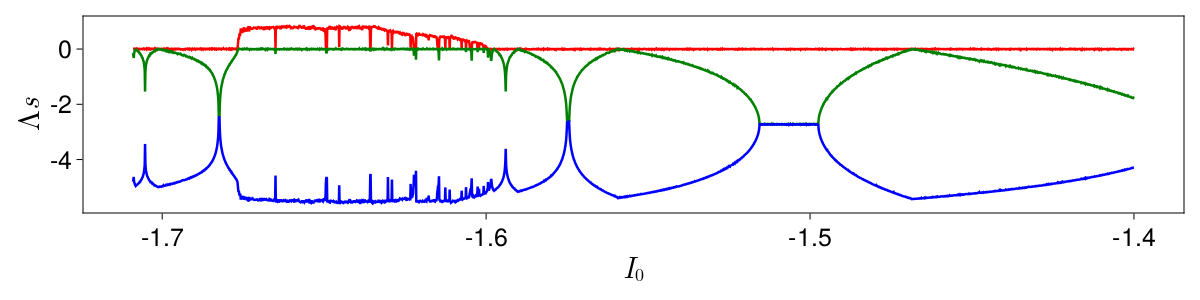

In [15]:
lb_size = 30; tck_size = 25;

f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"I_0", ylabel = L"\Lambda s",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, I0range, Λs[:, 1], linewidth = 2.5, color = :red)
lines!(axis, I0range, Λs[:, 2], linewidth = 2.5, color = :green)
lines!(axis, I0range, Λs[:, 3], linewidth = 2.5, color = :blue)
f